In [1]:
#Bottle-neck Analysis
from pandas import read_csv
from random import randint

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [2]:
#Read Data
df_i = read_csv(r".\customer_interaction.csv", index_col='category')
df_i.loc[:, 'ProductAdded'] = [x + randint(1000, 2500) for x in df_i.loc[:, 'ProductAdded']]
df_i

,ProductViewed,ProductAdded,CartViewed,CheckoutStarted,OrderCompleted
category,,,,,
jewelry,5565,2973,600,255,124
books,5582,2563,374,163,79
tools,8248,2468,746,325,149
beauty,9632,3653,728,303,161
outdoors,13357,2800,1067,436,220
electronics,15662,3426,1213,489,237
floral,19394,3751,1501,625,312
footwear,22518,5662,2359,934,447
groceries,23842,6209,2462,932,461


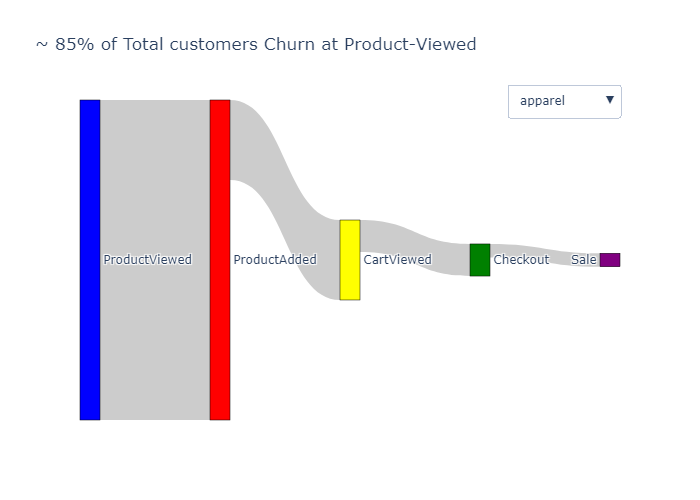

In [3]:
categories =df_i.index.values.tolist()
category_plot_names = []
fig = go.Figure()

buttons=[]

default_category = "apparel"

for cat in categories:
    x = sorted(df_i.loc[cat].values.tolist(), reverse=True)
    #print(x)
    fig.add_traces(go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ['ProductViewed', "ProductAdded", 'CartViewed','Checkout', 'Sale' ],
      color = ["blue", "red", "yellow", "green", "purple", "cyan", "black"] 
    ),
    link = dict(
      source = [0, 1, 2, 3, 4],
      target = [1, 2, 3, 4],
      value = x
    ), 
    visible=(cat==default_category)
    ))
    
    category_plot_names.append(cat)

for cat in categories:
    buttons.append(dict(method='update',
                        label=cat,
                        args = [{'visible': [cat==r for r in category_plot_names]}])) 
    
# Add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=[{"buttons": buttons, "direction": "down",
                                                  "active": categories.index(default_category),
                                                  "showactive": True, "x": 1, "y": 1.05}],
                  title_text = "~ 85% of Total customers Churn at Product-Viewed")
#fig.show() #uncomment to render interactive plot
fig.show(renderer= "png") #comment to render interactive plot
